## 3D Bar Graphs for paper



In [1]:
import numpy as np
import pandas as pd
import gzip, pickle
import os
import sys
from selectiontest import selectiontest
import datetime

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns


def create_3d_barplot(table, xticklabels, yticklabels, xlabel= None, ylabel=None, zlabel=None, pdfname=None,\
                      azim=None, elev=None, properties=dict(), lgnd=True):
    with PdfPages(pdfname) as pdf:
        fig = plt.figure()
        ax1 = fig.add_subplot(111, projection='3d')

        num_elements = table.shape[1] 
        halflen = int(num_elements / 2)

        mask = np.concatenate((np.ones(halflen), (np.zeros(halflen))))
        palette = sns.color_palette("colorblind", 2)
        col0 = palette[0]
        col1 = palette[1]
        color = [col0] * halflen + [col1] * halflen 
        taj_proxy = plt.Rectangle((0, 0), 1, 1, fc=col0)
        rho_proxy = plt.Rectangle((0, 0), 1, 1, fc=col1)
        xpos = table[0] + 0.4 * mask
        ypos = table[1] 
        zpos = np.zeros(num_elements)

        xticks = np.arange(len(xticklabels))
        plt.xticks([0, 1, 2, 3], xticklabels)
        #ax1.ticklabel_format(axis='x', style='sci')
        ax1.set_xlabel(xlabel, labelpad=5)

        yticks = np.arange(len(yticklabels)) + 0.5
        plt.yticks([0.5, 1.5, 2.5], yticklabels)
        ax1.set_ylabel(ylabel, labelpad=5)

        dx = np.ones(num_elements) / 4
        dy = np.ones(num_elements) / 2
        dz = table[2]

        ax1.set_zlim([0, 1])
        ax1.set_zlabel(zlabel, labelpad=5)
        if azim is not None:
            ax1.azim = azim
        if elev is not None:
            ax1.elev = elev
        ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color)
        if lgnd:
            ax1.legend([rho_proxy, taj_proxy],[r'$\rho $', 'Tajima\'s D'])
        d = pdf.infodict()
        for key in properties:
            d[key] = properties[key]
        pdf.savefig(fig, bbox_inches='tight')
    return fig

Configure positive selection data produced by roc_simulation.py into a table and plot. 
To save, rotate to best position, then adjust azimuth and elevation parameters. Press button at top to "stop interaction". Right-click image and "Open in new tab". Can then save .png file.

taj_true
8s30 0.3522 -1.73 1.73
8s31 0.822 -1.73 1.81
8s32 0.9613 -1.63 1.99
8s20 0.1127 -1.73 1.73
8s21 0.4253 -1.73 1.81
8s22 0.7068 -1.63 1.99
8s10 0.0107 -1.73 1.73
8s11 0.0459 -1.73 1.81
8s12 0.1146 -1.63 1.99
8s00 0.0165 -1.73 1.73
8s01 0.0346 -1.73 1.81
8s02 0.0571 -1.63 1.99

 rho_true
8s30 0.4593 0.71
8s31 0.9549 0.76
8s32 0.9941 0.46
8s20 0.4914 0.71
8s21 0.7866 0.76
8s22 0.881 0.46
8s10 0.1819 0.71
8s11 0.2438 0.76
8s12 0.2847 0.46
8s00 0.0983 0.71
8s01 0.1231 0.76
8s02 0.1528 0.46


<IPython.core.display.Javascript object>


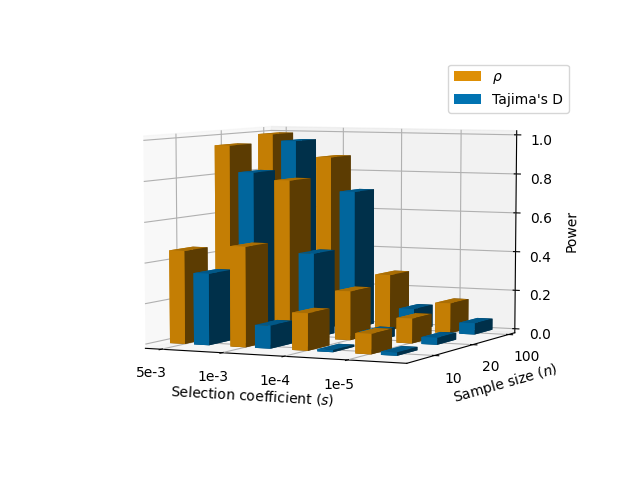

In [2]:
path = "/Users/helmutsimon/Google Drive/Genetics/Software/msms/lib/data8" 
if not os.getcwd() == path:
    os.chdir(path)

job_no = '8s'
table = list()

key = 'taj_true'
print(key)
thresholds = np.array([[-1.73, -1.73, -1.63], [1.73, 1.81, 1.99]])
for scene in [3, 2, 1, 0]:
    for i in range(3):
        lower = thresholds[0, i]
        upper = thresholds[1, i]
        job = job_no + str(scene) + str(i)
        filename = 'roc_data_' + job + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        successes = [1 for x in sim_results[key] if not (lower < x < upper)]
        success_rate = np.sum(successes) / len(sim_results[key])
        print(job, success_rate, lower, upper)
        table.append([3 - scene, i, success_rate])
        
key = 'rho_true'
print('\n', key)
thresholds = np.array([0.71, 0.76, 0.46])
for scene in [3, 2, 1, 0]:
    for i in range(3):
        threshold = thresholds[i]
        job = job_no + str(scene) + str(i)
        filename = 'roc_data_' + job + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        success_rate = np.sum(np.array(sim_results[key]) > threshold) / len(sim_results[key])
        print(job, success_rate, threshold)
        table.append([3 - scene, i, success_rate])        
        
        
table = np.array(table).T
table.shape
path = "/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data" 
if not os.getcwd() == path:
    os.chdir(path)
pdfname = "barplot3d_" + job_no + ".pdf"
#xticklabels = ['$5x 10^{-3}$', '$10^{-3}$','$10^{-4}$', '$10^{-5}$']
xticklabels = ['5e-3', '1e-3', '1e-4', '1e-5']
yticklabels = [10, 20, 100]
xlabel = "Selection coefficient ($s$)"
ylabel = "Sample size ($n$)"
zlabel = "Power"

properties = dict()
properties['Author'] = 'Helmut Simon'
properties['Title'] = 'Positive selection: rho vs Tajima D'
properties['Subject'] = 'Datafile: ' + filename
properties['Keywords'] = 'Sn = 10, FPR=0.05'
azim = -65
elev = 6
fig = create_3d_barplot(table, xticklabels, yticklabels, xlabel=xlabel, ylabel=ylabel, zlabel=zlabel, 
                        pdfname=pdfname, azim=azim, elev=elev, properties=properties)

In the following, we redo the same plot, but using a one-sided threshold of 0.05 for Tajima's D, taken from calibrate_tajD.py job 003. This is a fairer comparison if we are looking for evidence that there is a preponderance of low frequency alleles.

taj_true
8s30 0.7482 -1.53 1.99
8s31 0.9306 -1.52 1.99
8s32 0.9889 -1.45 1.99
8s20 0.4059 -1.53 1.99
8s21 0.6419 -1.52 1.99
8s22 0.8482 -1.45 1.99
8s10 0.0725 -1.53 1.99
8s11 0.11 -1.52 1.99
8s12 0.2016 -1.45 1.99
8s00 0.0541 -1.53 1.99
8s01 0.066 -1.52 1.99
8s02 0.1056 -1.45 1.99

 rho_true
8s30 0.4593 0.71
8s31 0.9549 0.76
8s32 0.9941 0.46
8s20 0.4914 0.71
8s21 0.7866 0.76
8s22 0.881 0.46
8s10 0.1819 0.71
8s11 0.2438 0.76
8s12 0.2847 0.46
8s00 0.0983 0.71
8s01 0.1231 0.76
8s02 0.1528 0.46


<IPython.core.display.Javascript object>


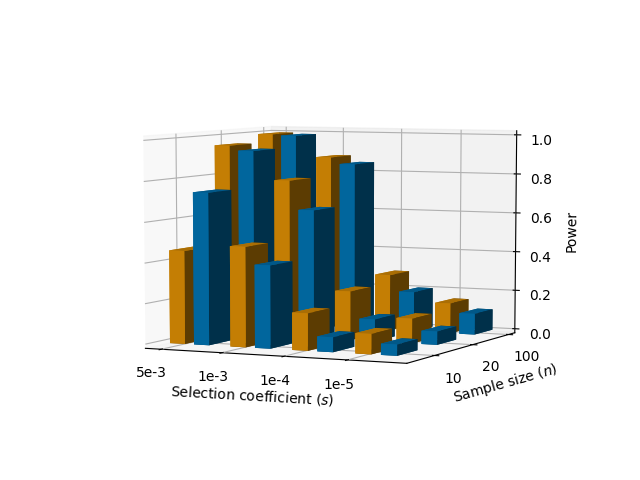

In [3]:
path = "/Users/helmutsimon/Google Drive/Genetics/Software/msms/lib/data8" 
if not os.getcwd() == path:
    os.chdir(path)

job_no = '8s'
table = list()

key = 'taj_true'
print(key)
thresholds = np.array([[-1.53, -1.52, -1.45], [1.45, 1.51, 1.62]])
for scene in [3, 2, 1, 0]:
    for i in range(3):
        lower = thresholds[0, i]
        job = job_no + str(scene) + str(i)
        filename = 'roc_data_' + job + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        successes = [1 for x in sim_results[key] if x < lower]
        success_rate = np.sum(successes) / len(sim_results[key])
        print(job, success_rate, lower, upper)
        table.append([3 - scene, i, success_rate])
        
key = 'rho_true'
print('\n', key)
thresholds = np.array([0.71, 0.76, 0.46])
for scene in [3, 2, 1, 0]:
    for i in range(3):
        threshold = thresholds[i]
        job = job_no + str(scene) + str(i)
        filename = 'roc_data_' + job + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        success_rate = np.sum(np.array(sim_results[key]) > threshold) / len(sim_results[key])
        print(job, success_rate, threshold)
        table.append([3 - scene, i, success_rate])        
        
        
table = np.array(table).T
table.shape
path = "/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data" 
if not os.getcwd() == path:
    os.chdir(path)
pdfname = "barplot3d_" + job_no + "a.pdf"
xticklabels = ['5e-3', '1e-3', '1e-4', '1e-5']
yticklabels = [10, 20, 100]
xlabel = "Selection coefficient ($s$)"
ylabel = "Sample size ($n$)"
zlabel = "Power"

properties = dict()
properties['Author'] = 'Helmut Simon'
properties['Title'] = 'Positive selection: rho vs Tajima D'
properties['Subject'] = 'Datafile: ' + filename
properties['Keywords'] = 'Sn = 10, FPR=0.05'
azim = -65
elev = 6
fig = create_3d_barplot(table, xticklabels, yticklabels, xlabel=xlabel, ylabel=ylabel, zlabel=zlabel, 
                        pdfname=pdfname, azim=azim, elev=elev, properties=properties, lgnd=False)

Bar plot for negative selection data. This uses .05 threshold for rho .

Thresholds for rho are from calibration_f103.csv and calibration_f104.csv.

Thresholds for Tajima's D are from calibration_tajD_f006.csv and calibration_tajD_f007.csv which have a two-sided threshold of 0.05 (one-sided threshold of 0.025).

taj_true
t1-00 0.2929 -1.72 1.68
t1-01 0.463 -1.72 1.67
t1-02 0.5192 -1.73 1.67
t1-10 0.1889 -1.73 1.69
t1-11 0.2746 -1.73 1.67
t1-12 0.3596 -1.72 1.67
t1-20 0.09 -1.73 1.71
t1-21 0.1202 -1.74 1.66
t1-22 0.1818 -1.72 1.67

 rho_true
t1-00 0.6928 -9.0
t1-01 0.8064 -19.0
t1-02 0.8373 -33.0
t1-10 0.6199 -6.0
t1-11 0.7286 -15.0
t1-12 0.7711 -26.0
t1-20 0.4363 -3.2
t1-21 0.5883 -10.7
t1-22 0.6426 -19.0


<IPython.core.display.Javascript object>


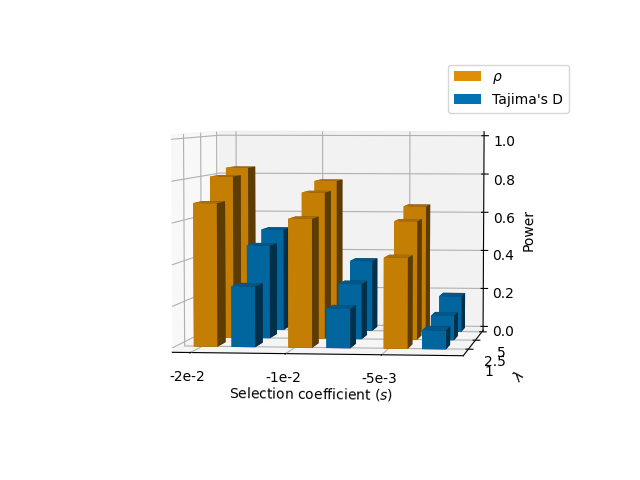

In [2]:
path = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/fwdpydata'
if not os.getcwd() == path:
    os.chdir(path)

job = 't1-'
table = list()

key = 'taj_true'
print(key)
lower_thrs = np.array([[-1.72, -1.72, -1.73], [-1.73, -1.73, -1.72], [-1.73, -1.74, -1.72]])
upper_thrs = np.array([[1.68, 1.67, 1.67], [1.69, 1.67, 1.67], [1.71, 1.66, 1.67]])
for i in range(3):
    for j in range(3):
        lower = lower_thrs[i, j]
        upper = upper_thrs[i, j]
        filename = 'fp_roc_data_' + job + str(i) + str(j) + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        successes = [1 for x in sim_results[key] if not (lower < x < upper)]
        success_rate = np.sum(successes) / len(sim_results[key])
        print(job + str(i) + str(j), success_rate, lower, upper)
        table.append([i, j, success_rate])
        
key = 'rho_true'
print('\n', key)
thresholds = np.array([[-9, -19, -33], [-6, -15, -26], [-3.2, -10.7, -19]])
for i in range(3):
    for j in range(3):
        threshold = thresholds[i, j]
        filename = 'fp_roc_data_' + job + str(i) + str(j) + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        success_rate = np.sum(np.array(sim_results[key]) > threshold) / len(sim_results[key])
        print(job + str(i) + str(j), success_rate, threshold)
        table.append([i, j, success_rate])  
        
        
table = np.array(table).T
path = "/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data" 
if not os.getcwd() == path:
    os.chdir(path)
pdfname = "barplot3d_fwdpy.pdf"
xticklabels = ['-2e-2', '-1e-2', '-5e-3']
yticklabels = [1, 2.5, 5]
xlabel = "Selection coefficient ($s$)"
ylabel = "$\lambda $"
zlabel = "Power"
properties = dict()
properties['Author'] = 'Helmut Simon'
properties['Title'] = 'Negative selection: rho vs Tajima D'
properties['Subject'] = 'Datafile: ' + filename
properties['Keywords'] = 'n = 20'
azim = -83
elev = 4
fig = create_3d_barplot(table, xticklabels, yticklabels, xlabel=xlabel, ylabel=ylabel, zlabel=zlabel,
                        pdfname=pdfname, azim=azim, elev=elev, properties=properties)

Bar plot for negative selection data. This uses .05 threshold for rho .

Thresholds for rho are from calibration_f103.csv and calibration_f104.csv.

Thresholds for Tajima's D are from calibration_tajD_f004.csv and calibration_tajD_f005.csv which have a two-sided threshold of 0.1 (one-sided threshold of 0.05).

[[0.     0.     0.     1.     1.     1.     2.     2.     2.     0.
  0.     0.     1.     1.     1.     2.     2.     2.    ]
 [0.     1.     2.     0.     1.     2.     0.     1.     2.     0.
  1.     2.     0.     1.     2.     0.     1.     2.    ]
 [0.5012 0.6708 0.7264 0.3665 0.5042 0.5716 0.2058 0.2904 0.3604 0.6928
  0.8064 0.8373 0.6199 0.7286 0.7711 0.4363 0.5883 0.6426]]


<IPython.core.display.Javascript object>


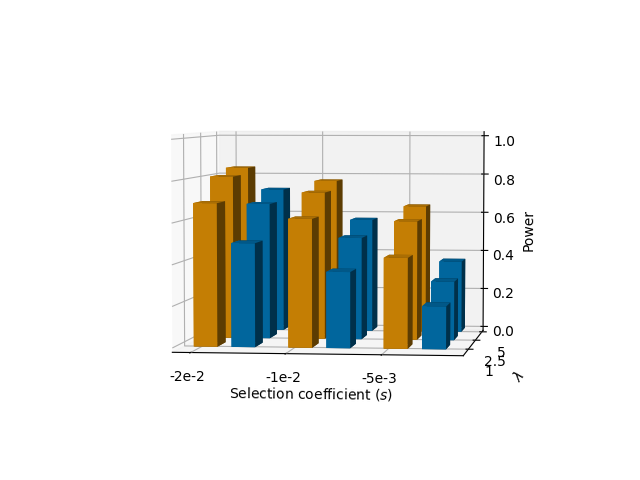

In [3]:
path = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/fwdpydata'
if not os.getcwd() == path:
    os.chdir(path)

lgnd = False
job = 't1-'
table = list()

key = 'taj_true'
lower_thrs = np.array([[-1.49, -1.49, -1.48], [-1.49, -1.48, -1.49], [-1.48, -1.48, -1.49]])
for i in range(3):
    for j in range(3):
        lower = lower_thrs[i, j]
        filename = 'fp_roc_data_' + job + str(i) + str(j) + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        successes = [1 for x in sim_results[key] if x < lower]
        success_rate = np.sum(successes) / len(sim_results[key])
        table.append([i, j, success_rate])
        
key = 'rho_true'
thresholds = np.array([[-9, -19, -33], [-6, -15, -26], [-3.2, -10.7, -19]])
for i in range(3):
    for j in range(3):
        threshold = thresholds[i, j]
        filename = 'fp_roc_data_' + job + str(i) + str(j) + '.pklz'
        with gzip.open(filename, 'rb') as sim_results:
            sim_results = pickle.load(sim_results)
        success_rate = np.sum(np.array(sim_results[key]) > threshold) / len(sim_results[key])
        table.append([i, j, success_rate])  
        
        
table = np.array(table).T
print(table)
path = "/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data" 
if not os.getcwd() == path:
    os.chdir(path)
pdfname = "barplot3d_fwdpya.pdf"
xticklabels = ['-2e-2', '-1e-2', '-5e-3']
yticklabels = [1, 2.5, 5]
xlabel = "Selection coefficient ($s$)"
ylabel = "$\lambda $"
zlabel = "Power"
properties = dict()
properties['Author'] = 'Helmut Simon'
properties['Title'] = 'Negative selection: rho vs Tajima D'
properties['Subject'] = 'Datafile: ' + filename
properties['Keywords'] = 'n = 20'
azim = -83
elev = 4
fig = create_3d_barplot(table, xticklabels, yticklabels, xlabel=xlabel, ylabel=ylabel, zlabel=zlabel, 
                        pdfname=pdfname, azim=azim, elev=elev, properties=properties, lgnd=False)

Do examples for expanding population

taj_true
4d00 0.0295 -1.73 1.73
4d01 0.1433 -1.73 1.73
4d02 0.2981 -1.73 1.73
4d03 0.2357 -1.73 1.73
4d10 0.0125 -1.73 1.81
4d11 0.0331 -1.73 1.81
4d12 0.0468 -1.73 1.81
4d13 0.0275 -1.73 1.81

 rho_true
4d00 0.2409 0.71
4d01 0.4929 0.71
4d02 0.5685 0.71
4d03 0.3188 0.71
4d10 0.0533 0.76
4d11 0.1177 0.76
4d12 0.1127 0.76
4d13 0.0386 0.76
[[0.     0.     0.     0.     1.     1.     1.     1.     0.     0.
  0.     0.     1.     1.     1.     1.    ]
 [0.     1.     2.     3.     0.     1.     2.     3.     0.     1.
  2.     3.     0.     1.     2.     3.    ]
 [0.0295 0.1433 0.2981 0.2357 0.0125 0.0331 0.0468 0.0275 0.2409 0.4929
  0.5685 0.3188 0.0533 0.1177 0.1127 0.0386]]


<IPython.core.display.Javascript object>


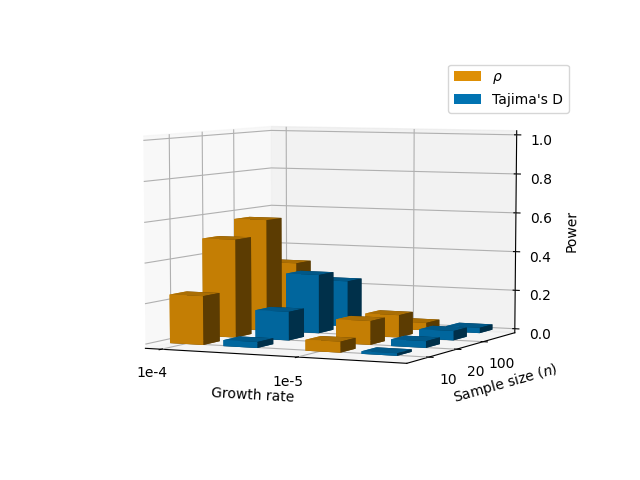